In [258]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import pandas as pd
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss,classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
rest1 = pd.read_csv('restaurant_customer_satisfaction.csv',index_col=0)


In [3]:
rest1.columns


Index(['Age', 'Gender', 'Income', 'VisitFrequency', 'AverageSpend',
       'PreferredCuisine', 'TimeOfVisit', 'GroupSize', 'DiningOccasion',
       'MealType', 'OnlineReservation', 'DeliveryOrder',
       'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating', 'HighSatisfaction'],
      dtype='object')

In [4]:
rest1['HighSatisfaction'].head()
rest1['HighSatisfaction'].value_counts()

HighSatisfaction
0    1299
1     201
Name: count, dtype: int64

In [5]:
rest1.isnull().sum()

Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [6]:
X = rest1.drop('HighSatisfaction',axis=1)
y = rest1['HighSatisfaction']

In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24,stratify=y)

In [232]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 1477 to 1072
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1050 non-null   int64  
 1   Gender                1050 non-null   object 
 2   Income                1050 non-null   int64  
 3   VisitFrequency        1050 non-null   object 
 4   AverageSpend          1050 non-null   float64
 5   PreferredCuisine      1050 non-null   object 
 6   TimeOfVisit           1050 non-null   object 
 7   GroupSize             1050 non-null   int64  
 8   DiningOccasion        1050 non-null   object 
 9   MealType              1050 non-null   object 
 10  OnlineReservation     1050 non-null   int64  
 11  DeliveryOrder         1050 non-null   int64  
 12  LoyaltyProgramMember  1050 non-null   int64  
 13  WaitTime              1050 non-null   float64
 14  ServiceRating         1050 non-null   int64  
 15  FoodRating            1

In [12]:
rest1.head(100)

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
CustomerID,,,,,,,,,,,,,,,,,,
654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,20,Female,147362,Rarely,45.280988,Indian,Lunch,2,Business,Dine-in,0,0,0,50.056644,4,3,4,0
750,62,Male,30306,Monthly,128.923092,Chinese,Dinner,6,Casual,Takeaway,0,0,1,53.919505,3,5,5,0
751,53,Male,99064,Weekly,46.924394,Indian,Lunch,8,Casual,Dine-in,0,1,0,7.345462,1,1,5,0


In [13]:
rest1['Age'].corr(rest1['AverageSpend'])

0.017765408060572693

In [14]:
corr_value = rest1[['Age', 'AverageSpend']].corr()
corr_value

,Age,AverageSpend
Age,1.000000,0.017765
AverageSpend,0.017765,1.000000


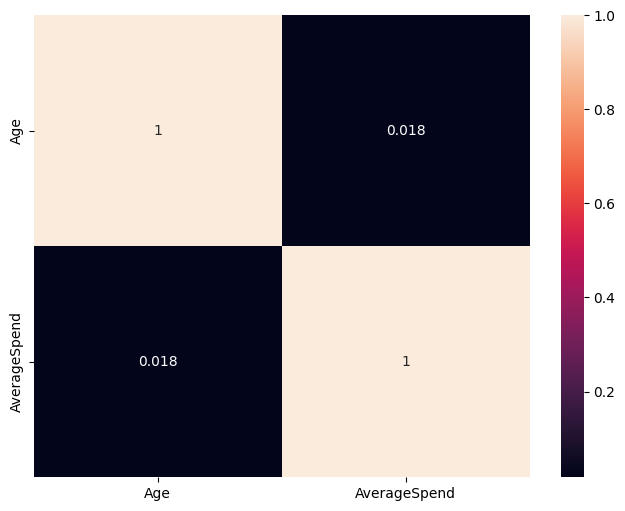

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_value,annot=True)
plt.show()

## 1. a. Age and Average Spend is not Correlated significantly the above Heatmap shows

In [17]:
avg_g = rest1.groupby('Gender')['AverageSpend'].mean()

## 1.b. mean average spending for both the genders separately.

In [19]:
avg_g

Gender
Female    105.471643
Male      105.850916
Name: AverageSpend, dtype: float64

In [20]:
mean_age = rest1.groupby('TimeOfVisit')['Age'].mean()

## 1.c. Average age for all the categories of Time of Visit

In [22]:
mean_age

TimeOfVisit
Breakfast    43.559289
Dinner       43.500000
Lunch        44.432271
Name: Age, dtype: float64

In [23]:
rarely_visiting = rest1[rest1['VisitFrequency'] == 'Rarely' ]

In [24]:
cuisine_counts = rarely_visiting['PreferredCuisine'].value_counts(normalize=True) * 100

In [25]:
most_preferred_cuisine = cuisine_counts.idxmax()
percentage = cuisine_counts.max()


## 1.d. the people rarely visiting, the most preferred cuisine by percentage is: 'Italian' with 29.07% preference.

In [27]:
print(f"The most preferred cuisine among rarely visiting people is {most_preferred_cuisine} with {percentage:.2f}% preference.")

The most preferred cuisine among rarely visiting people is Italian with 29.07% preference.


In [28]:
weekly_visiting = rest1[rest1['VisitFrequency'] == 'Weekly' ]

In [29]:
meal_type = weekly_visiting['MealType'].mode()

## 1.e. the people weekly visiting, what is the most frequent meal type is "Takeaway"

In [31]:
meal_type

0    Takeaway
Name: MealType, dtype: object

In [32]:
business_type  = rest1[rest1['DiningOccasion'] == 'Business' ]

In [33]:
cuisine_type = business_type['PreferredCuisine'].mode()

## 1.f. the business type of dining occasion, "Italian" is most frequent preferred cuisine

In [35]:
cuisine_type

0    Italian
Name: PreferredCuisine, dtype: object

In [36]:
group_size = rest1[rest1['GroupSize'] > 5 ]

In [37]:
business_type = group_size[group_size['DiningOccasion']=='Business'] 
business_type

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
CustomerID,,,,,,,,,,,,,,,,,,
660,20,Female,131104,Weekly,120.236707,Indian,Lunch,6,Business,Dine-in,0,0,0,7.927917,5,4,1,0
661,51,Female,137882,Weekly,160.979098,Mexican,Dinner,6,Business,Dine-in,1,1,0,56.447210,4,3,3,0
675,40,Female,85259,Monthly,61.456659,Indian,Dinner,9,Business,Dine-in,0,1,1,12.834379,3,2,5,0
680,51,Male,105609,Rarely,12.690321,Chinese,Dinner,6,Business,Takeaway,1,0,0,24.074858,5,1,5,0
692,23,Female,70427,Weekly,154.462649,Mexican,Lunch,8,Business,Dine-in,0,1,1,42.905875,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,24,Female,113426,Weekly,130.459040,Chinese,Dinner,6,Business,Takeaway,0,0,1,1.945449,4,2,1,0
2135,21,Male,144252,Daily,86.428886,Mexican,Dinner,7,Business,Dine-in,0,1,1,22.197765,4,5,4,0
2136,52,Male,115595,Weekly,63.183463,Chinese,Breakfast,6,Business,Dine-in,0,0,1,4.359898,4,5,5,0


## 1.g. the group size bigger than 5 is  33.33% is percentage of business type of dining occasion

In [39]:
(business_type.shape[0]/group_size.shape[0]) * 100

33.33333333333333

In [40]:
pref_chin = rest1[rest1['PreferredCuisine'] == 'Chinese' ]

In [41]:
sat_chin = pref_chin[pref_chin['HighSatisfaction']==1]

## 1. h. the customers preferring Chinese cuisine, 13.55 percentage are satisfied

In [43]:
(sat_chin.shape[0]/pref_chin.shape[0]) * 100

13.548387096774196

In [44]:
pref_chin = rest1[rest1['PreferredCuisine'] == 'Chinese' ]

## 1.i. 3.07 is average rating given to the food by the customers preferring Chinese cuisine

In [46]:
pref_chin['FoodRating'].mean()

3.0709677419354837

## 1.j.	For the customers preferring Chinese cuisine, 29.52 is the average waiting time

In [48]:
pref_chin['WaitTime'].mean()

29.51653917994555

## 2

## OneHotEncoding

## Kernel = Linear

In [94]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')
svm = SVC(kernel='linear') 

In [96]:
pipe = Pipeline([('OHE',ct),('SVM',svm)])

In [98]:
pipe.get_params()

{'memory': None,
 'steps': [('OHE',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663C8350>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663C9670>)],
                     verbose_feature_names_out=False)),
  ('SVM', SVC(kernel='linear'))],
 'verbose': False,
 'OHE': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663C8350>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                 

In [115]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
params = {
         
          'SVM__probability':[True]
          
         
         }


## GridSearchCV

In [118]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss', cv = kfold, verbose = 3,n_jobs=-1)
gcv.fit(X,y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663C8350>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663C9670>)],
                                                          verbose_feature_names_out=False)),
                                       ('SVM', SVC(kernel='linear'))]),
             n_jobs=-1, param_grid={'SVM__probability': [True]},
             scoring='neg_log_loss', verbose=3)

In [120]:
print(gcv.best_params_)
print(gcv.best_score_)

{'SVM__probability': True}
-0.39394169425869296


In [122]:
gcv.best_estimator_

Pipeline(steps=[('OHE',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA671D2030>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA6642E090>)],
                                   verbose_feature_names_out=False)),
                ('SVM', SVC(kernel='linear', probability=True))])

## Kernel = 'rbf'

In [124]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')
svm = SVC(kernel='rbf') 

In [126]:
pipe = Pipeline([('OHE',ct),('SVM',svm)])
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
params = {
          'SVM__C': [0.1, 1, 10],
          'SVM__probability':[True]
          
         
         }


In [128]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss', cv = kfold, verbose = 3,n_jobs=-1)
gcv.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66404410>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66407E90>)],
                                                          verbose_feature_names_out=False)),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': [0.1, 1, 10], 'SVM__probability': [True]},
             scoring='neg_log_loss', verbose=3)

In [130]:
print(gcv.best_params_)
print(gcv.best_score_)

{'SVM__C': 1, 'SVM__probability': True}
-0.3940515425595125


In [132]:
gcv.best_estimator_

Pipeline(steps=[('OHE',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA61FEF650>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA663F79B0>)],
                                   verbose_feature_names_out=False)),
                ('SVM', SVC(C=1, probability=True))])

## Decision Tree Classifier

In [204]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')
dtc = DecisionTreeClassifier(random_state=24)


In [206]:
pipe = Pipeline([('OHE',ct),('DTC',dtc)])



In [208]:
pipe.get_params()

{'memory': None,
 'steps': [('OHE',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA67E12600>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA68042B70>)],
                     verbose_feature_names_out=False)),
  ('DTC', DecisionTreeClassifier(random_state=24))],
 'verbose': False,
 'OHE': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA67E12600>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'

In [210]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 24)
params = {
    
    'DTC__min_samples_leaf': [1,2,4,5],
    
    'DTC__min_samples_split': [2, 5, 10]
}


In [212]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss', cv = kfold, verbose = 3)
gcv.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=-6.608 total time=   0.0s
[CV 2/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=-7.209 total time=   0.0s
[CV 3/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=-7.089 total time=   0.0s
[CV 4/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=-9.251 total time=   0.0s
[CV 5/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=2;, score=-7.689 total time=   0.0s
[CV 1/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=5;, score=-5.937 total time=   0.0s
[CV 2/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=5;, score=-6.193 total time=   0.0s
[CV 3/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=5;, score=-6.769 total time=   0.0s
[CV 4/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=5;, score=-7.507 total time=   0.0s
[CV 5/5] END DTC__min_samples_leaf=1, DTC__min_samples_split=5;, s

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA67E12600>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA68042B70>)],
                                                          verbose_feature_names_out=False)),
                                       ('DTC',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'DTC__min_samples_leaf': [1, 2, 4, 5],
                         'DTC__min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss', verbose=3)

In [214]:
print(gcv.best_params_)
print(gcv.best_score_)

{'DTC__min_samples_leaf': 5, 'DTC__min_samples_split': 2}
-3.5301316355295436


In [252]:
model_dtc = gcv.best_estimator_


## Random Forest Classifier

In [165]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')

In [167]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
params = {'RF__max_depth':[2,3,4,5,6,None]}
pipe = Pipeline([('OHE',ct),('RF',rf)])
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state =24)
gcv = GridSearchCV(pipe,param_grid = params, cv = kfold, scoring = 'neg_log_loss',verbose = 3,n_jobs = -1)
gcv.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('OHE',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66500680>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66500E30>)],
                                                          verbose_feature_names_out=False)),
                                       ('RF',
                                        RandomForestClassifier(n_estimators=10,
                                                               random_state=24))]),
             n_jobs=-1, param_grid={'RF__max_depth': [2, 3, 4, 5, 6, None]},
             scoring='neg_log_loss', verbose=3)

In [171]:
print(gcv.best_params_)
print(gcv.best_score_)

{'RF__max_depth': 6}
-0.336914733952183


In [175]:
gcv.best_estimator_

Pipeline(steps=[('OHE',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66501FD0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001FA66502C90>)],
                                   verbose_feature_names_out=False)),
                ('RF',
                 RandomForestClassifier(max_depth=6, n_estimators=10,
                                        random_state=24))])

## 2.c. Log loss score

In [178]:
ohe = OneHotEncoder(sparse_output = False,handle_unknown = 'ignore').set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),
                                  (ohe,make_column_selector(dtype_include = object) ),
                                  verbose_feature_names_out = False).set_output(transform = 'pandas')
svm = SVC(kernel='linear') 

In [180]:
pipe = Pipeline([('OHE',ct),('SVM',svm)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
log_loss(y_test,y_pred)

4.725723444350916

In [182]:
svm = SVC(kernel='rbf') 
pipe = Pipeline([('OHE',ct),('SVM',svm)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
log_loss(y_test,y_pred)

4.725723444350916

In [184]:
dtc = DecisionTreeClassifier(random_state=24)
pipe = Pipeline([('OHE',ct),('DTC',dtc)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
log_loss(y_test,y_pred)

7.288827685354802

In [186]:
rf = RandomForestClassifier(n_estimators=10, random_state=24)
pipe = Pipeline([('OHE',ct),('RFC',rf)])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
log_loss(y_test,y_pred)

4.165044391631316

## 2.c: For Random Forest Classifier , getting lowest log loss score